In [3]:
# Importing libary
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
pip install tensorflow_datasets

     |████████████████████████████████| 3.6 MB 382 kB/s eta 0:00:01
     |████████████████████████████████| 81 kB 967 kB/s eta 0:00:01
     |████████████████████████████████| 44 kB 633 kB/s eta 0:00:01
     |████████████████████████████████| 100 kB 1.3 MB/s ta 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21495 sha256=1f2c3061ed86bd638ff7031011410b702c713de7687b63ece16014ed03e8fbc2
  Stored in directory: /Users/mustainbillah/Library/Caches/pip/wheels/29/93/c6/762e359f8cb6a5b69c72235d798804cae523bbe41c2aa8333d
Successfully built promise
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow-metadata 0.25.0 requires absl-py<0.11,>=0.9, but you'll have absl-py 0.8.1 which is incompatible.
Note: you may need t

In [8]:
import tensorflow_datasets as tfds

In [9]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'e2e_cleaned', 'emnist', 

In [12]:
mnist_train = tfds.load(name="mnist", split="train")
assert isinstance(mnist_train, tf.data.Dataset)
print(mnist_train)

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


Label: 4


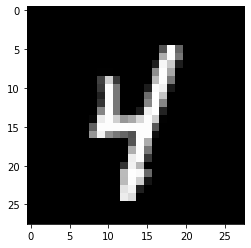

In [15]:
for mnist_example in mnist_train.take(1):
    image, label = mnist_example['image'], mnist_example['label']
    plt.imshow(image.numpy()[:,:,0].astype(np.float32), cmap=plt.get_cmap('gray'))
    print('Label: %d' % label.numpy())

In [16]:
mnist_builder = tfds.builder('mnist')

In [18]:
print(mnist_builder.info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [19]:
test = mnist_builder.info
print(test.features)
print(test.features['label'].num_classes)
print(test.features['label'].names)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})
10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [20]:
mnist_test, info = tfds.load('mnist', split='test', with_info=True)

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


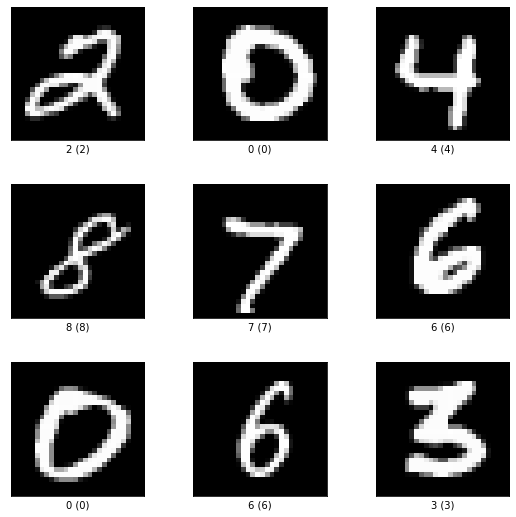

In [21]:
fig = tfds.show_examples(info, mnist_test)

In [22]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [23]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True,
                             with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /Users/mustainbillah/tensorflow_datasets/fashion_mnist/3.0.1.incomplete2Z2W9A/fashion_mnist-train.tfrecord
Shuffling and writing examples to /Users/mustainbillah/tensorflow_datasets/fashion_mnist/3.0.1.incomplete2Z2W9A/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /Users/mustainbillah/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [24]:
print(metadata)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [25]:
class_name =['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
# exploring data

In [28]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [30]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', 
                           activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', 
                           activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [34]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))


Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.4001 - accuracy: 0.8547
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2603 - accuracy: 0.9057
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2150 - accuracy: 0.9220
Epoch 4/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1853 - accuracy: 0.9318
Epoch 5/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1559 - accuracy: 0.9412
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1328 - accuracy: 0.9512
Epoch 7/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1119 - accuracy: 0.9581
Epoch 8/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0934 - accuracy: 0.9656
Epoch 9/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0825 - accuracy: 0.9685
Epoch 10/10
1875/1875 [====================